In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import pprint

import matplotlib.pyplot as plt
# %matplotlib inline #for encoding
from sklearn.model_selection import train_test_split 
#for decision tree object
from sklearn.tree import DecisionTreeClassifier 
#for checking testing results
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#for visualizing tree 
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv("data/adult.csv")
df_New = df.drop(columns=['fnlwgt'])

print(df_New.dtypes)
print()
df_New.head(5)

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
class             object
dtype: object



,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [3]:
# to test pandas installation
# pd.test()

"""
Part 1  : Classification.
"""
ClassLabels = df_New["class"]
print("Class Label in pandas object : \n")
print(ClassLabels.head(5))
print()
print("---------------------------------\n")
print("Class labels in numpy array : \n")
print(ClassLabels.to_numpy())

Class Label in pandas object : 

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: class, dtype: object

---------------------------------

Class labels in numpy array : 

['<=50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '>50K']


In [4]:
"""
Question 1: i
"""
# df.describe()
Number_of_instances = len(df_New.index)
print(f"Number of instances : {Number_of_instances}")

"""
Question 1: ii
"""

# Easier way :
nullValuesEasy = df_New.isnull().sum().sum()
# Hard Way :
nullValues = 0
null_value_object = df_New.isnull().sum()
# print(type(null_value_object))
for i in null_value_object:
    if (i != 0 ) :
        nullValues += i
    
print(f"Number of null values : {nullValues}")       
# df_New.info()


"""
Question 1: iii
"""

# Drop class from dataset
df_New_noClass = df_New.drop(columns=['class'])
# df_New_noClass.head()
row , col = df_New_noClass.shape
total_number_of_instances = row * col
print(f"Total number of attributes : {total_number_of_instances}")
Fraction_Of_missing_Values = nullValuesEasy / total_number_of_instances
print(f"Fraction of missing values over all attributes : {Fraction_Of_missing_Values}")


"""
Question 1: iv
"""
count = 0
for row in range(len(df_New_noClass)):
    for key in df_New_noClass.loc[row]:
        if (pd.isna(key)):
            count+=1
            break

print(f"Number of instances with missing values : {count}")
# print(df.loc[0].isnull() == "false")

Number of instances : 48842
Number of null values : 6465
Total number of attributes : 634946
Fraction of missing values over all attributes : 0.010181968230369197
Number of instances with missing values : 3620


In [5]:

"""
Question 1: v
"""
Fraction_of_instances_with_missingValues_OverAll = count / Number_of_instances
print(f"Fraction of instances with missing values over all instances : {Fraction_of_instances_with_missingValues_OverAll}")

Fraction of instances with missing values over all instances : 0.07411653904426518


In [6]:
# test Code
df_New_noClass.dtypes
print()

if (df_New_noClass["age"].dtypes == object ) :
    print("ok")


In [7]:
"""
Question 2: 
"""
# LabelEncoder = preprocessing.LabelEncoder()

# LabelEncoder.fit(df_New_noClass["age"])
# print(LabelEncoder.classes_)


# LabelEncoder.fit(df_New_noClass["workclass"].astype(str) )
# print(LabelEncoder.classes_)

# LabelEncoder.fit(df_New_noClass["education"].astype(str) )
# print(LabelEncoder.classes_)

# LabelEncoder.fit(df_New_noClass["education-num"])
# print(LabelEncoder.classes_)

# LabelEncoder.fit(df_New_noClass["marital-status"].astype(str) )
# print(LabelEncoder.classes_)

# LabelEncoder.fit(df_New_noClass["occupation"].astype(str) )
# print(LabelEncoder.classes_)

# LabelEncoder.fit(df_New_noClass["relationship"].astype(str) )
# print(LabelEncoder.classes_)

# LabelEncoder.fit(df_New_noClass["race"].astype(str) )
# print(LabelEncoder.classes_)

# LabelEncoder.fit(df_New_noClass["sex"].astype(str) )
# print(LabelEncoder.classes_)

# LabelEncoder.fit(df_New_noClass["capitalgain"] )
# print(LabelEncoder.classes_)

# LabelEncoder.fit(df_New_noClass["capitalloss"] )
# print(LabelEncoder.classes_)

# LabelEncoder.fit(df_New_noClass["hoursperweek"] )
# print(LabelEncoder.classes_)

# LabelEncoder.fit(df_New_noClass["native-country"].astype(str) )
# print(LabelEncoder.classes_)

def descritization(data):
    Label_list = {}
    LabelEncoder = preprocessing.LabelEncoder()
    for label in data.columns.values:
        if(data[label].dtypes == int or data[label].dtypes == str):
            LabelEncoder.fit(data[label])
            Label_list[label] = list(LabelEncoder.classes_)
        else :
            LabelEncoder.fit(data[label].astype(str))
            Label_list[label] = list(LabelEncoder.classes_)
    
    return Label_list

labels = descritization(df_New_noClass)
pprint.pprint(labels)


{'age': [0, 1, 2, 3, 4],
 'capitalgain': [0, 1, 2, 3, 4],
 'capitalloss': [0, 1, 2, 3, 4],
 'education': ['10th',
               '11th',
               '12th',
               '1st-4th',
               '5th-6th',
               '7th-8th',
               '9th',
               'Assoc-acdm',
               'Assoc-voc',
               'Bachelors',
               'Doctorate',
               'HS-grad',
               'Masters',
               'Preschool',
               'Prof-school',
               'Some-college'],
 'education-num': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 'hoursperweek': [0, 1, 2, 3, 4],
 'marital-status': ['Divorced',
                    'Married-AF-spouse',
                    'Married-civ-spouse',
                    'Married-spouse-absent',
                    'Never-married',
                    'Separated',
                    'Widowed'],
 'native-country': ['Cambodia',
                    'Canada',
                    'China',
                    'Co

In [8]:
"""
Question 3:
Descision Tree in python : 
steps - 
1. Gini impurity
3. Entropy
2. Information Gain
"""


'\nQuestion 3:\nDescision Tree in python : \nsteps - \n1. Gini impurity\n3. Entropy\n2. Information Gain\n'

In [9]:
### Data Preprocessing

# Target Values, Class Labels , Y 
LabelEncoder = preprocessing.LabelEncoder()
y = LabelEncoder.fit_transform(ClassLabels)
print(ClassLabels.unique())
print("-------------------")
print(f"Encoded Labels : {y}")
# print(type(y))

['<=50K' '>50K']
-------------------
Encoded Labels : [0 0 0 ... 0 0 1]


In [10]:
# Feature vector, Instances , X 

def descritization(data):
    # encode categorical variables using label Encoder
    # select all categorical variables

    df_Encoded = df.drop(columns=['fnlwgt','class'])
    df_categorical = df_Encoded.select_dtypes(include=['object'])
    le = preprocessing.LabelEncoder()
    df_categorical = df_categorical.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
    # Next, Concatenate df_categorical dataframe with original df (dataframe)
    # first, Drop earlier duplicate columns which had categorical values

    df_Encoded = df_Encoded.drop(df_categorical.columns,axis=1)
    df_Encoded = pd.concat([df_Encoded,df_categorical],axis=1)
    #df_Encoded.head()
    return df_Encoded
    
df_Encoded = descritization(df)
X = df_Encoded
df_Encoded.head(5)
# df_Encoded.info()

,age,education-num,capitalgain,capitalloss,hoursperweek,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,2,13,1,0,2,6,9,4,0,1,4,1,38
1,3,13,0,0,0,5,9,2,3,0,4,1,38
2,2,9,0,0,2,3,11,0,5,1,4,1,38
3,3,7,0,0,2,3,1,2,5,0,2,1,38
4,1,13,0,0,2,3,9,2,9,5,2,0,4


In [11]:
# Splitting the data - 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 99)
print(f"Training split input: {X_train.shape}")
print(f"Testing split input : {X_test.shape}")

Training split input: (34189, 13)
Testing split input : (14653, 13)


In [12]:
# Modeling Tree and testing it
# Defining the decision tree algorithmdtree=DecisionTreeClassifier()

dtree=DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train,y_train)


print("--------------------------------")
print('Decision Tree Classifier Created')


--------------------------------
Decision Tree Classifier Created


In [13]:
# Importing decision tree classifier from sklearn library
# from tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [14]:
# making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     11068
           1       0.76      0.51      0.61      3585

    accuracy                           0.84     14653
   macro avg       0.81      0.73      0.75     14653
weighted avg       0.83      0.84      0.83     14653



Text(0.5, 1.0, 'Accuracy Score: 0.8405104756705112')

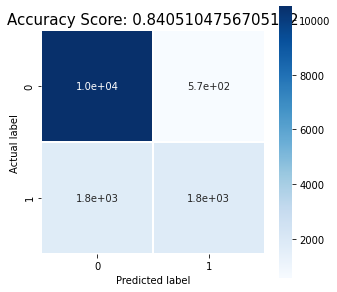

In [15]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_default)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

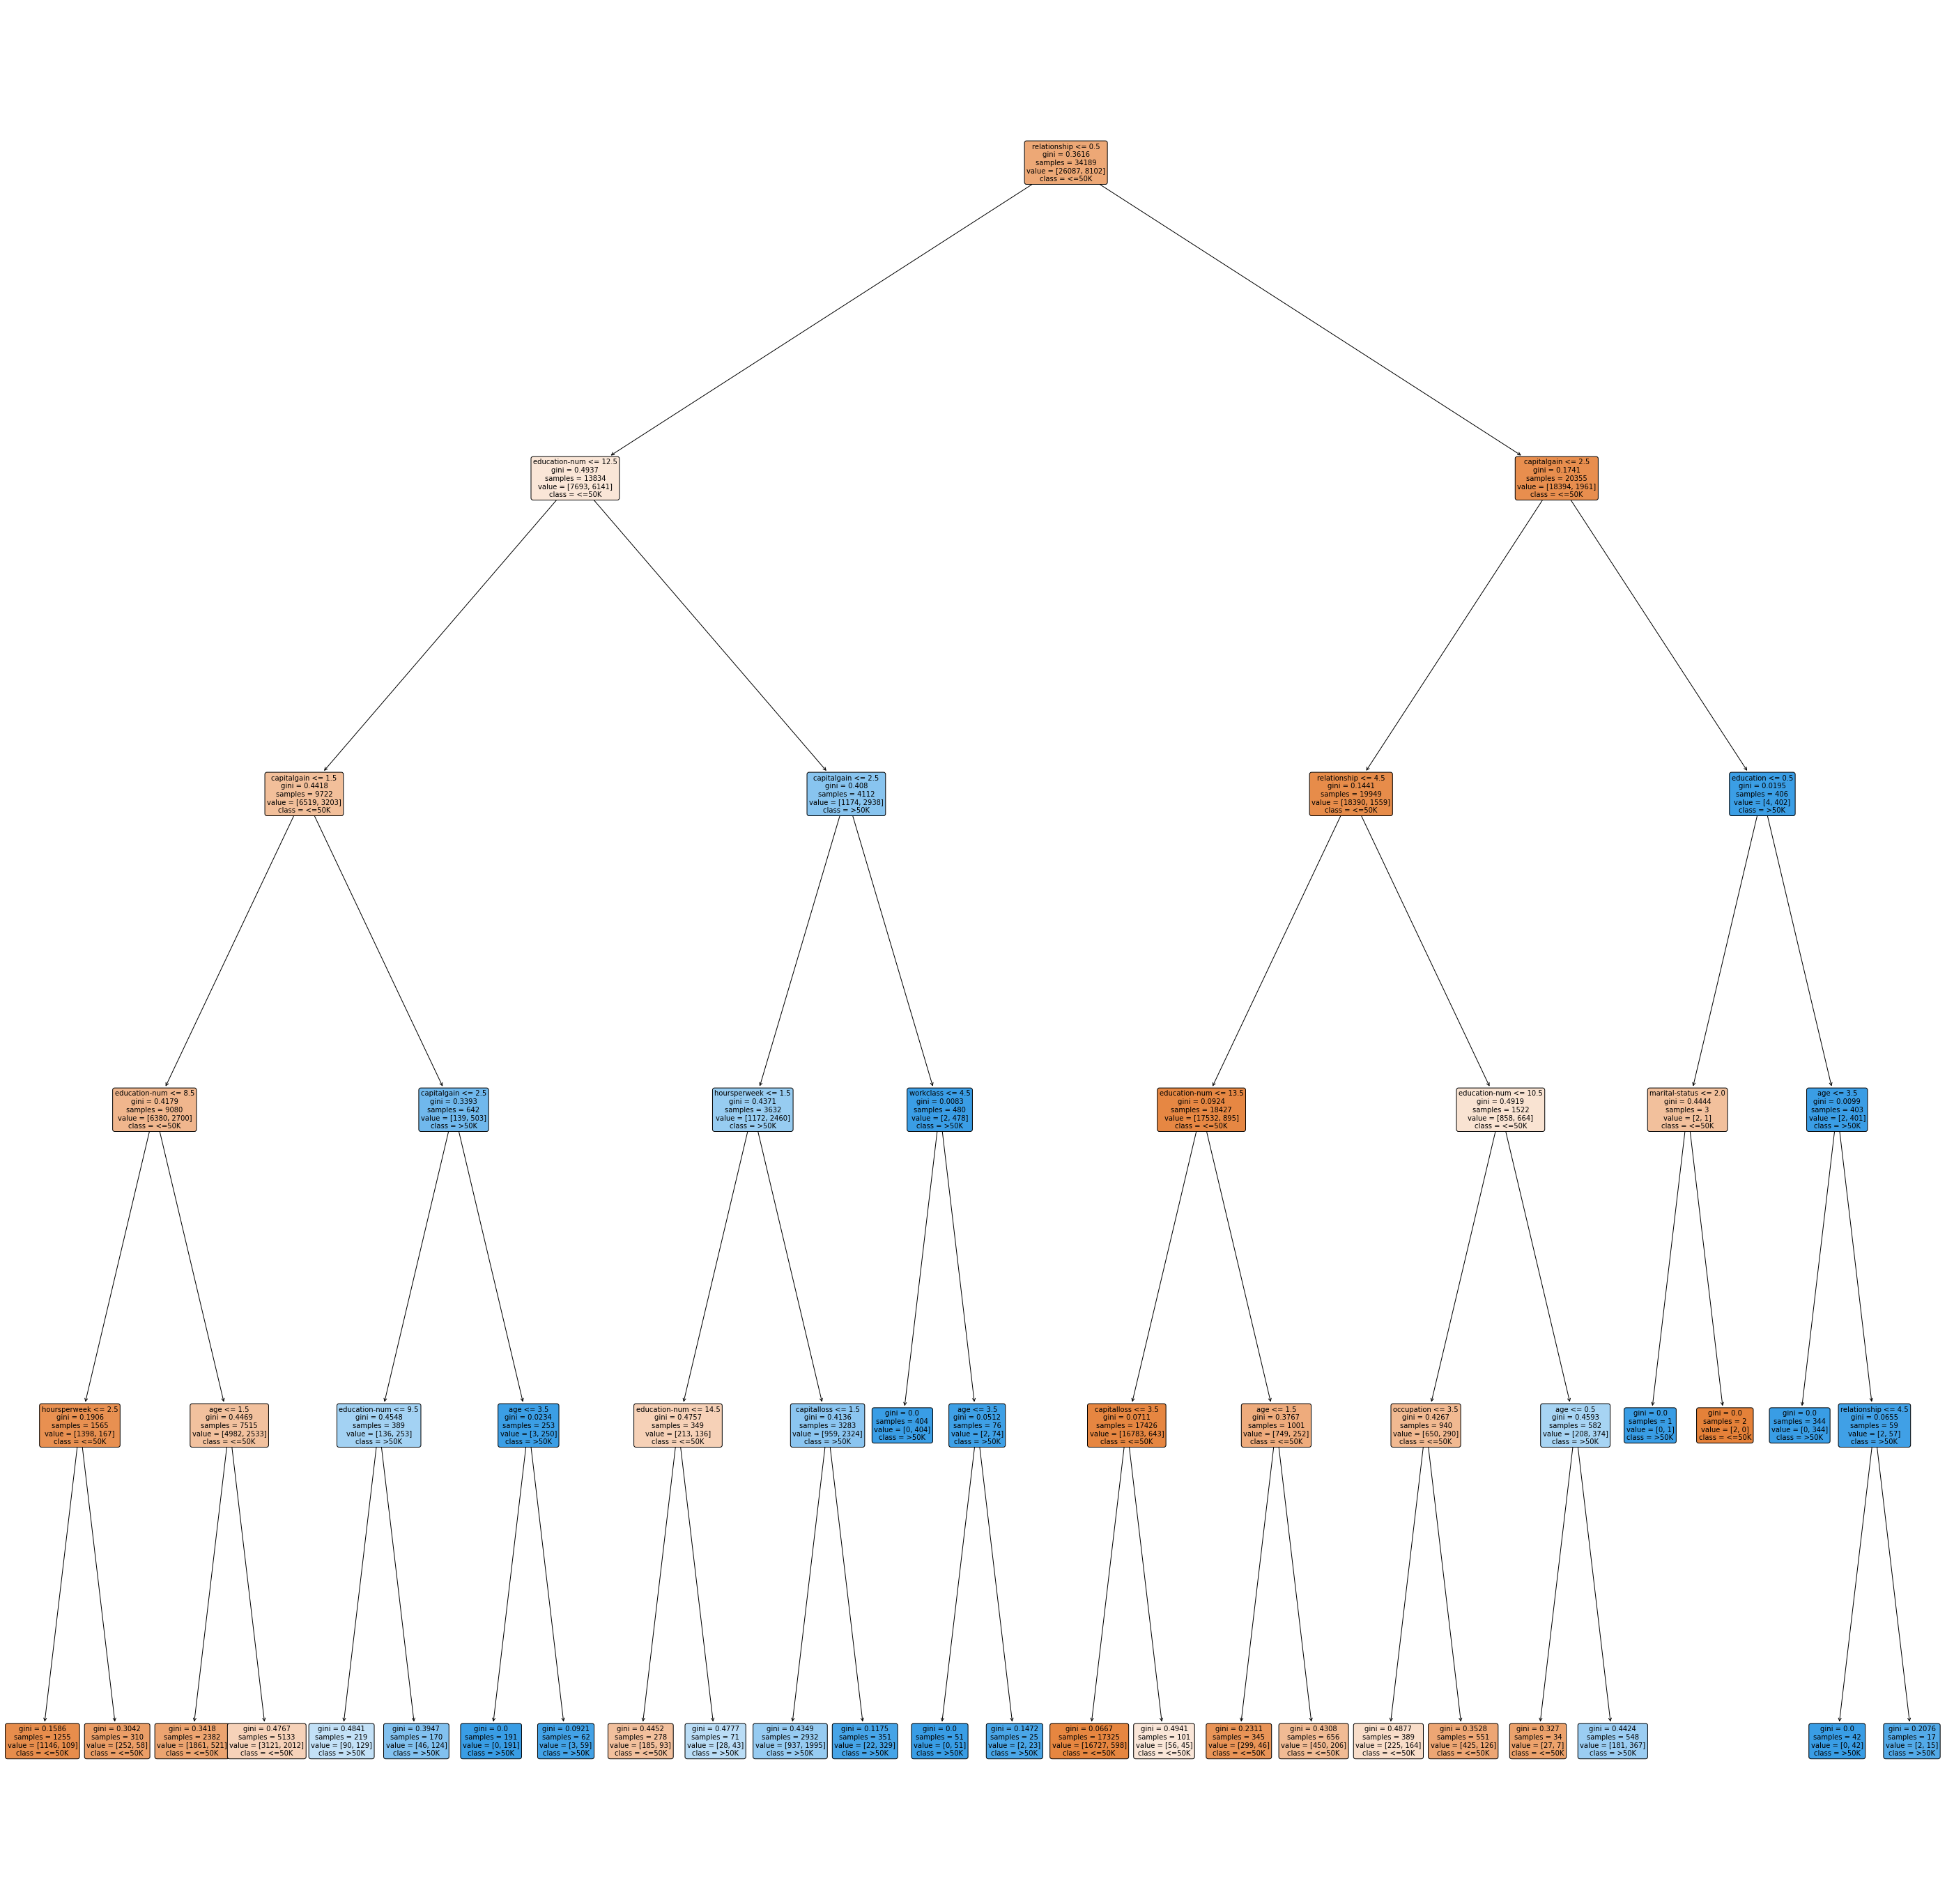

In [16]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
# dec_tree = plot_tree(decision_tree=dtree, feature_names = df_Encoded.columns, 
#                      class_names = ClassLabels.unique() , filled = True , precision = 4, rounded = True)

plt.figure(figsize=(50,50))  # set plot size (denoted in inches)
plot_tree(decision_tree=dtree, 
               feature_names = df_Encoded.columns, 
               class_names = ClassLabels.unique() , 
               filled = True , precision = 4, rounded = True, fontsize=10)
plt.show()

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_default).ravel()
print(f"tn : {tn}")
print(f"fp : {fp}")
print(f"fn : {fn}")
print(f"tp : {tp}")

Error_Rate = (fp+fn) / (tn+fp+fn+tp)
print(f"Error Rate : {Error_Rate}")
print(f"Accuracy Score : {1-Error_Rate}")

tn : 10500
fp : 568
fn : 1769
tp : 1816
Error Rate : 0.15948952432948885
Accuracy Score : 0.8405104756705112


In [18]:
"""
Question 4 : Handling Missing Values 
"""
# question 4 i
# New dataset with only missing values : 
D_prime_null = df_New[df_New.isna().any(axis=1)]
D_prime_null.head()
print(len(D_prime_null))
# print(D_prime_null.info)

# question 4 ii
# filter out all rows containing one or more missing values

D_prime_notnull = df_New.dropna()
D_prime_notnull.head()

# Select x number of rows randomly
D_prime_notnull_eq = D_prime_notnull.sample(n=3620, random_state=1)
D_prime_notnull_eq.head()
print(len(D_prime_notnull_eq))
# print(D_prime_notnull_eq.info)

# Merge the 2 data sets

# D_prime = pd.merge(D_prime_null, D_prime_notnull_eq, how='outer')
D_prime = pd.concat([D_prime_null,D_prime_notnull_eq], axis=0)
print(len(D_prime))
# D_prime.head()

3620
3620
7240


In [19]:
# D one prime and D 2 prime initialisation

D_one_prime = D_prime.fillna("missing")
# D_one_prime.head()
# print(D_prime.isna().any())

D_two_prime = D_prime.fillna(df_New_noClass.mode().iloc[0])
# D_two_prime.head()

# D prime class labels :

D_one_prime_class = D_one_prime["class"]
# D_one_prime_class.head()
D_two_prime_class = D_two_prime["class"]
# D_two_prime_class.head()

# Drop class from d prime dataset
D_one_prime = D_one_prime.drop(columns=["class"])
# D_one_prime.head()

D_two_prime = D_two_prime.drop(columns=["class"])
# D_two_prime.head()

In [20]:
# Feature Vector X and class label y init for d prime datasets
# D-1-prime

X_one_prime = D_one_prime
y_one_prime = D_one_prime_class

# D-2-prime

X_two_prime = D_two_prime
y_two_prime = D_two_prime_class

# Test data set for d one prime

# 20 % of original data set for testing
X_one_prime_test = df_New.sample(frac=0.3, random_state=1)
X_one_prime_test = X_one_prime_test.fillna("missing")

y_one_prime_test = X_one_prime_test["class"]
# print(y_one_prime_test)

#X_one_prime_test.head()
#print(len(X_one_prime_test))

# Test data set for d two prime

# 20 % of original data set for testing
X_two_prime_test = df_New.sample(frac=0.3, random_state=1)
X_two_prime_test = X_two_prime_test.fillna(df_New_noClass.mode().iloc[0])

y_two_prime_test = X_two_prime_test["class"]
# print(y_two_prime_test)

#print(len(X_two_prime_test))
#X_one_prime_test.head()

# Drop and recreate x prime test instances
X_one_prime_test = X_one_prime_test.drop(columns=["class"])
X_two_prime_test = X_two_prime_test.drop(columns=["class"])

In [21]:
### Data Preprocessing

# Target Values, Class Labels , Y 
LabelEncoder = preprocessing.LabelEncoder()
print("--------------------- Train ---------------------")


y_one_prime_encode = LabelEncoder.fit_transform(y_one_prime)
print(ClassLabels.unique())
print("-------------------")
print(f"Encoded class Labels of D one prime : {y_one_prime_encode}")
# print(type(y))
print()
print("-------------------")
print("-------------------")
print()
y_two_prime_encode = LabelEncoder.fit_transform(y_two_prime)
print(ClassLabels.unique())
print("-------------------")
print(f"Encoded class Labels of D two prime : {y_two_prime_encode}")

print()
print("------------ Test Labels ------------")
print()

y_one_prime_encode_test = LabelEncoder.fit_transform(y_one_prime_test)
print(ClassLabels.unique())
print("-------------------")
print(f"Encoded class Labels of D one prime test: {y_one_prime_encode_test}")
# print(type(y))
print()
print("-------------------")
print("-------------------")
print()
y_two_prime_encode_test = LabelEncoder.fit_transform(y_two_prime_test)
print(ClassLabels.unique())
print("-------------------")
print(f"Encoded class Labels of D two prime test: {y_two_prime_encode_test}")

--------------------- Train ---------------------
['<=50K' '>50K']
-------------------
Encoded class Labels of D one prime : [1 1 1 ... 0 0 0]

-------------------
-------------------

['<=50K' '>50K']
-------------------
Encoded class Labels of D two prime : [1 1 1 ... 0 0 0]

------------ Test Labels ------------

['<=50K' '>50K']
-------------------
Encoded class Labels of D one prime test: [0 0 0 ... 0 0 0]

-------------------
-------------------

['<=50K' '>50K']
-------------------
Encoded class Labels of D two prime test: [0 0 0 ... 0 0 0]


In [22]:
# Feature vector, Instances , X 

def descritization(data):
    # encode categorical variables using label Encoder
    # select all categorical variables

    df_categorical = data.select_dtypes(include=['object'])
    le = preprocessing.LabelEncoder()
    df_categorical = df_categorical.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
    
    # Next, Concatenate df_categorical dataframe with original df (dataframe)
    # first, Drop earlier duplicate columns which had categorical values

    df_Encoded = data.drop(df_categorical.columns,axis=1)
    df_Encoded = pd.concat([df_Encoded,df_categorical],axis=1)
    return df_Encoded

# -------------- Train -----------------------
# D one and two prime descritization
d_one_prime_Encoded = descritization(X_one_prime)
X_one_prime = d_one_prime_Encoded
# X_one_prime.head(5)
# df_Encoded.info()

d_two_prime_Encoded = descritization(X_two_prime)
X_two_prime = d_two_prime_Encoded
# X_two_prime.head(5)

# ----------------- Test -----------------------
d_one_prime_Encoded_test = descritization(X_one_prime_test)
X_one_prime_test = d_one_prime_Encoded_test

d_two_prime_Encoded_test = descritization(X_two_prime_test)
X_two_prime_test = d_two_prime_Encoded_test


In [23]:
# Descision tree classifier for D one and two prime datasets


d_one_prime_tree=DecisionTreeClassifier(max_depth=5)
d_one_prime_tree.fit(X_one_prime,y_one_prime_encode)

print("--------------------------------")
print('Decision Tree Classifier Created')
print("--------------------------------")
print()


d_two_prime_tree=DecisionTreeClassifier(max_depth=5)
d_two_prime_tree.fit(X_two_prime,y_two_prime_encode)

print("--------------------------------")
print('Decision Tree Classifier Created')
print("--------------------------------")

--------------------------------
Decision Tree Classifier Created
--------------------------------

--------------------------------
Decision Tree Classifier Created
--------------------------------


In [24]:
# making predictions
y_one_prime_predict = d_one_prime_tree.predict(X_one_prime_test)

# Printing classifier report after prediction
print(classification_report(y_one_prime_encode_test,y_one_prime_predict))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     11152
           1       0.77      0.50      0.61      3501

    accuracy                           0.84     14653
   macro avg       0.81      0.73      0.75     14653
weighted avg       0.84      0.84      0.83     14653



In [25]:
# making predictions
y_two_prime_predict = d_two_prime_tree.predict(X_two_prime_test)

# Printing classifier report after prediction
print(classification_report(y_two_prime_encode_test,y_two_prime_predict))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     11152
           1       0.77      0.50      0.61      3501

    accuracy                           0.84     14653
   macro avg       0.81      0.73      0.76     14653
weighted avg       0.84      0.84      0.83     14653



In [26]:
# Error rate and accuracy score for D one prime data set
tn, fp, fn, tp = confusion_matrix(y_one_prime_encode_test, y_one_prime_predict).ravel()
print(f"tn : {tn}")
print(f"fp : {fp}")
print(f"fn : {fn}")
print(f"tp : {tp}")

Error_Rate = (fp+fn) / (tn+fp+fn+tp)
print(f"Error Rate : {Error_Rate}")
print(f"Accuracy Score : {1-Error_Rate}")
cf = confusion_matrix(y_one_prime_encode_test, y_one_prime_predict).ravel()

print(cf)

tn : 10619
fp : 533
fn : 1746
tp : 1755
Error Rate : 0.1555312905207125
Accuracy Score : 0.8444687094792875
[10619   533  1746  1755]


In [27]:
# Error rate and accuracy score for D one prime data set
tn, fp, fn, tp = confusion_matrix(y_two_prime_encode_test, y_two_prime_predict).ravel()
print(f"tn : {tn}")
print(f"fp : {fp}")
print(f"fn : {fn}")
print(f"tp : {tp}")

Error_Rate = (fp+fn) / (tn+fp+fn+tp)
print(f"Error Rate : {Error_Rate}")
print(f"Accuracy Score : {1-Error_Rate}")

tn : 10617
fp : 535
fn : 1740
tp : 1761
Error Rate : 0.1552583088787279
Accuracy Score : 0.8447416911212721


In [28]:
"""
Clustering
"""
wholeSale = pd.read_csv("data/wholesale_customers.csv")
wholeSale.head(5)
wholeSale_modified = wholeSale.drop(columns=['Channel','Region'])
wholeSale_modified.head(5)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [29]:
wholeSale_modified.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [30]:
wholeSale_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [31]:
desc = wholeSale_modified.describe()
desc.drop(["25%", "50%", "75%"])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [32]:
# import pandas_profiling
# wholeSale_modified.profile_report()

In [33]:
"""
Part 2 , K - means
"""
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(wholeSale_modified)

y_kmeans = kmeans.labels_
centers = kmeans.cluster_centers_
SSE = kmeans.inertia_
#wholeSale_modified.head()
distSpace = kmeans.transform(wholeSale_modified)


In [34]:

#Plots : 
Fresh = wholeSale_modified.to_numpy()[:,0]
Milk = wholeSale_modified.to_numpy()[:,1]
Grocery = wholeSale_modified.to_numpy()[:,2]
Frozen = wholeSale_modified.to_numpy()[:,3]
Detergents_Paper = wholeSale_modified.to_numpy()[:,4]
Delicassen = wholeSale_modified.to_numpy()[:,5]

Attributes_Dict = {
    "Fresh" : Fresh,
    "Milk" : Milk , 
    "Grocery" : Grocery , 
    "Frozen" : Frozen ,
    "Detergents_Paper" : Detergents_Paper ,
    "Delicassen" : Delicassen 
 }



ListofAttributes = ["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]

import itertools
Combination = list(itertools.combinations(ListofAttributes, 2))

for each in Combination:
    print(each)
    

('Fresh', 'Milk')
('Fresh', 'Grocery')
('Fresh', 'Frozen')
('Fresh', 'Detergents_Paper')
('Fresh', 'Delicassen')
('Milk', 'Grocery')
('Milk', 'Frozen')
('Milk', 'Detergents_Paper')
('Milk', 'Delicassen')
('Grocery', 'Frozen')
('Grocery', 'Detergents_Paper')
('Grocery', 'Delicassen')
('Frozen', 'Detergents_Paper')
('Frozen', 'Delicassen')
('Detergents_Paper', 'Delicassen')


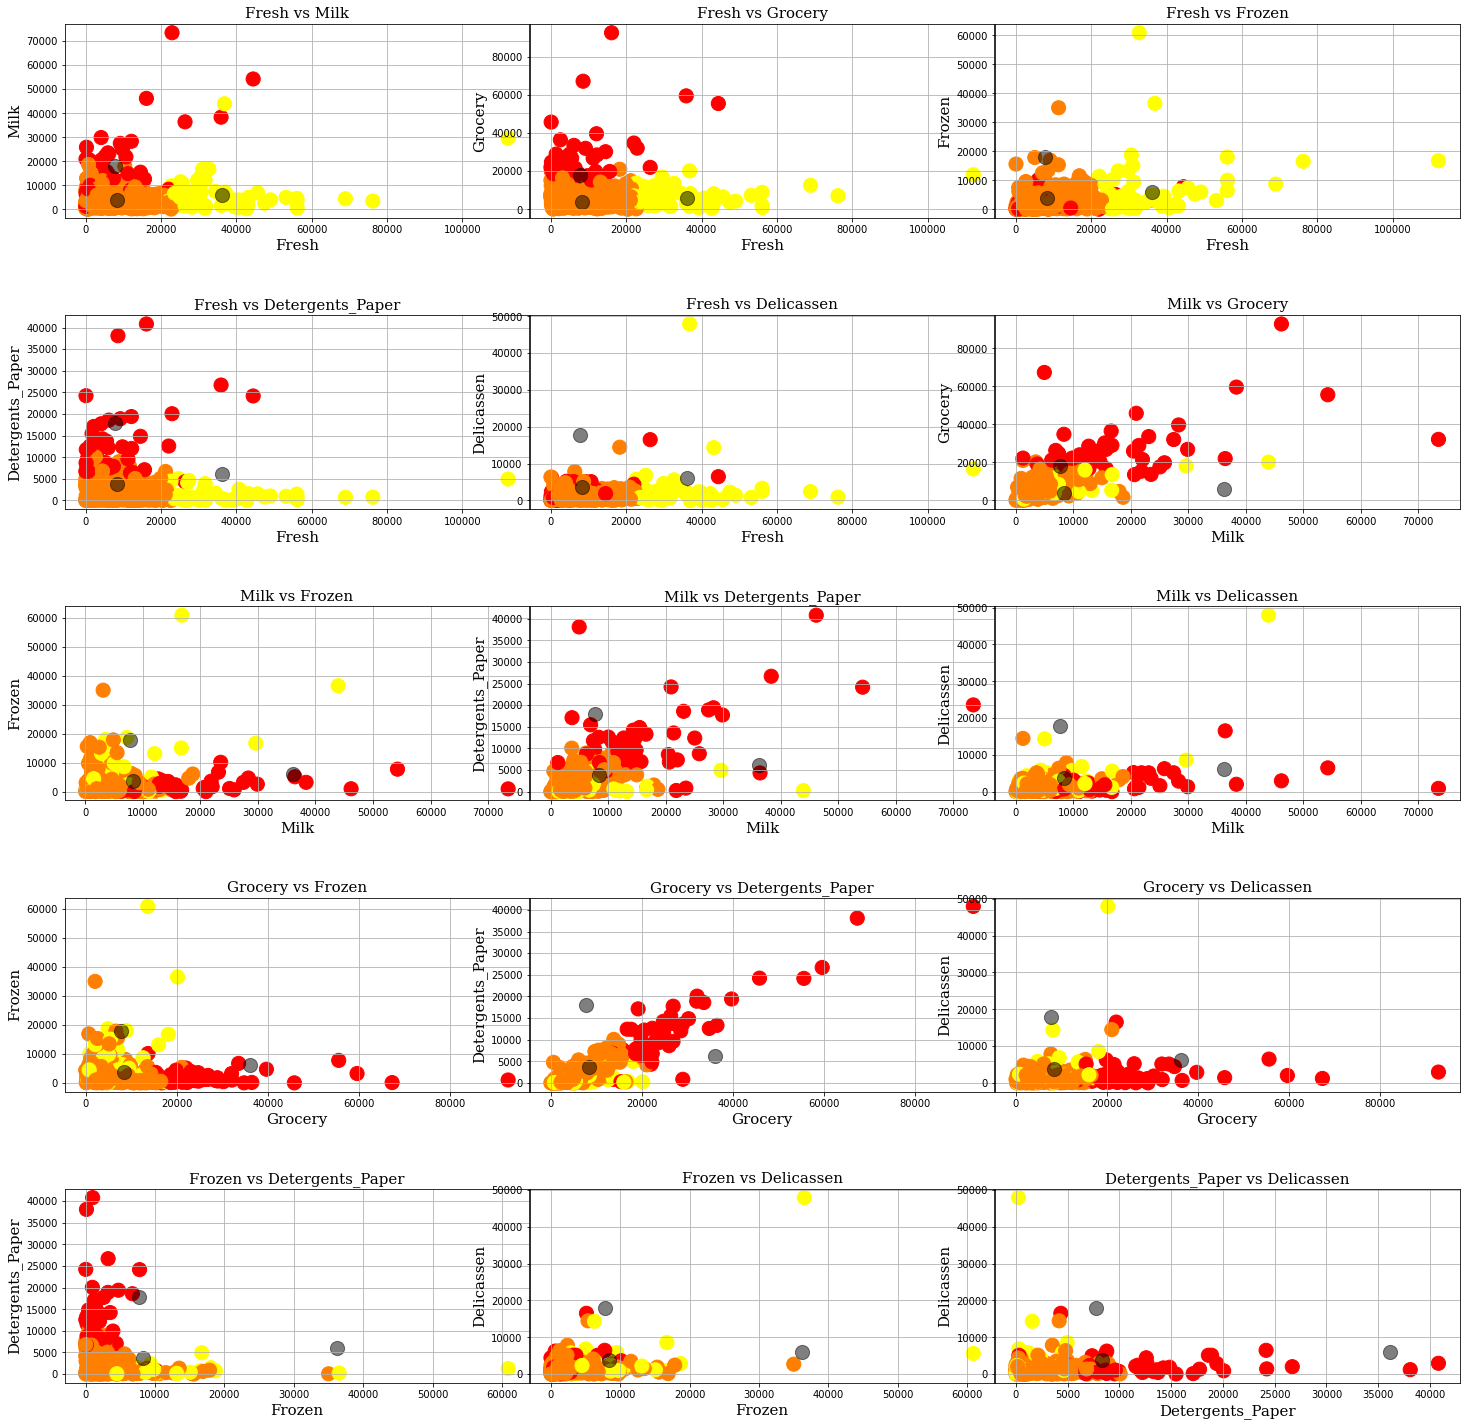

In [35]:
"""
Plot with Fresh and Rest
"""
# plt.subplot(3, 5, 1)

def Scatter_Plot(fig_num,x,y,y_kmeans,xlabel,ylabel):
    plt.figure(fig_num)
    plt.scatter(x,y, c=y_kmeans, s=200, cmap='autumn')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    plt.grid()
    font = {'family':'serif','color':'black','size':15}
    plt.title(f"{xlabel} vs {ylabel}",fontdict=font)
    plt.xlabel(xlabel,fontdict=font)
    plt.ylabel(ylabel,fontdict=font)
#     plt.show()

# fig_num = 0

# plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
# for each in Combination:
#     x = Attributes_Dict[each[0]]
#     y = Attributes_Dict[each[1]]
#     xlabel = each[0]
#     ylabel = each[1]
#     Scatter_Plot(fig_num,x,y,y_kmeans,xlabel,ylabel)
#     fig_num += 1
        
    
fig, axs = plt.subplots(5,3, figsize=(25, 25), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)


for ax, each in zip(axs.ravel(), Combination):
   
    x = Attributes_Dict[each[0]]
    y = Attributes_Dict[each[1]]
    xlabel = each[0]
    ylabel = each[1]
    ax.scatter(x,y, c=y_kmeans, s=200, cmap='autumn')
#     centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    ax.grid()
    font = {'family':'serif','color':'black','size':15}
    
#     plt.title(f"{xlabel} vs {ylabel}",fontdict=font)
#     plt.xlabel(xlabel,fontdict=font)
#     plt.ylabel(ylabel,fontdict=font)
    
    ax.set_xlabel(xlabel,fontdict=font)
    ax.set_ylabel(ylabel,fontdict=font)
    ax.set_title(f"{xlabel} vs {ylabel}",fontdict=font)

plt.show()




In [36]:
from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(centers)
print(dists)
print()

tri_dists = dists[np.triu_indices(3,1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()
print(tri_dists)
print()
print(SSE)
BC_euclid = max_dist+ avg_dist + min_dist

CH = ((BC_euclid*(440-3))/(SSE*2))
print(CH)


[[    0.         28076.8448139  38980.64764576]
 [28076.8448139      0.         28334.11094215]
 [38980.64764576 28334.11094215     0.        ]]

[28076.8448139  38980.64764576 28334.11094215]

80342166920.9407
0.000268847000000085


In [37]:
from sklearn import metrics 

CH = metrics.calinski_harabasz_score(wholeSale_modified, y_kmeans) 
print(CH)
print(SSE)
n = 440
k = 3

def get_CH(data,labels):
    CH = metrics.calinski_harabasz_score(data, labels) 
    return CH

210.10052336614766
80342166920.9407


In [38]:
BC = (CH*SSE*(k-1))/(n-k)
print(BC)

ch_ = (BC*(n-k))/(SSE*(k-1))
print(ch_)

def get_BC(ch,sse,n,k):
    BC = (CH*SSE*(k-1))/(n-k)
    return BC

77253690244.66837
210.10052336614766


In [39]:
"""
Question 2 Point 3
"""

K_set = [3,5,10]
analytics = {}

def k_means_algorithm(num,data):
    kmeans = KMeans(n_clusters=num, random_state=0).fit(data)
    y_kmeans = kmeans.labels_
    centers = kmeans.cluster_centers_
    SSE = kmeans.inertia_
    analytics[num] = {
        "y_kmeans" : y_kmeans,
        "centers" : centers,     
        "SSE" : SSE        
    }

for i in K_set:
    k_means_algorithm(i,wholeSale_modified)
    

In [40]:
# pprint.pprint(analytics)

"""
constants
"""
n = len(wholeSale_modified)
k = [3,5,10]
"""
k = 3
"""
k_3_SSE = analytics[3]["SSE"]
k_3_labels = analytics[3]["y_kmeans"]

"""
k = 5
"""
k_5_SSE = analytics[5]["SSE"]
k_5_labels = analytics[5]["y_kmeans"]

"""
k = 10
"""
k_10_SSE = analytics[10]["SSE"]
k_10_labels = analytics[10]["y_kmeans"]

"""
CH
"""

CH_3 = get_CH(wholeSale_modified,k_3_labels)
CH_5 = get_CH(wholeSale_modified,k_5_labels)
CH_10 =get_CH(wholeSale_modified,k_10_labels)

"""
BC
"""

K_3_BC = get_BC(CH_3,k_3_SSE,440,3)

K_5_BC = get_BC(CH_5,k_5_SSE,440,5)
K_10_BC = get_BC(CH_10,k_10_SSE,440,10)
# print(K_3_BC)
# print(K_5_BC)
# print(K_10_BC)

k_3_ratio = K_3_BC/k_3_SSE
k_5_ratio = K_5_BC/k_5_SSE
k_10_ratio = K_10_BC/k_10_SSE


data = np.array([
    [K_3_BC,K_5_BC,K_10_BC],
    [k_3_SSE,k_5_SSE,k_10_SSE],
    [k_3_ratio,k_5_ratio,k_10_ratio],
    [CH_3,CH_5,CH_10]
])

print(data)

[[7.72536902e+10 1.55217759e+11 3.53300888e+11]
 [8.03421669e+10 5.30190626e+10 2.97341451e+10]
 [9.61558459e-01 2.92758400e+00 1.18819925e+01]
 [2.10100523e+02 2.14502593e+02 2.05452299e+02]]


Text(0.5, 1.0, 'Table of analytics :')

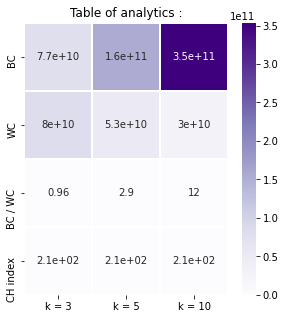

In [41]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_default)
plt.figure(figsize=(5,5))
x_axis_labels = ["k = 3","k = 5", "k = 10"]
y_axis_labels = ["BC","WC","BC / WC", "CH index"]
sns.heatmap(data=data,linewidths=.5, annot=True,square = True,  cmap = 'Purples',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title("Table of analytics :")


In [42]:
import jedi
jedi.__version__


'0.17.2'